In [38]:

#######################
# clustering part one #
#######################

def cluster(kmeansInput):
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans

    data = np.vstack((kmeansInput['Costs_sum'], kmeansInput['total_income_month'])).T
    K = 10
    kmeans = KMeans(n_clusters=K, n_init=10, random_state=42)
    kmeans.fit(data)

    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    cluster_dict = {i: [] for i in range(K)}
    for label, address in zip(labels, kmeansInput.index):
        cluster_dict[label].append(address)
    
    sorted_clusters = sorted(cluster_dict.items(), key=lambda item: np.linalg.norm(centroids[item[0]]))
    sorted_cluster_dict = {i: cluster for i, (cluster_id, cluster) in enumerate(sorted_clusters)}
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
    plt.xlabel('Income')
    plt.ylabel('Spent')
    plt.title('K-means Clustering of Income and Spent')
    plt.show()

    return sorted_cluster_dict

#######################
# clustering part two #
#######################
def wcss(kmeansInput):
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    wcss = []
    data = np.vstack((kmeansInput['Costs_sum'], kmeansInput['total_income_month'])).T

    for k in range(1, 21):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 21), wcss, marker='o')
    plt.xlabel('Number of clusters (K)')
    plt.ylabel('Within-Cluster Sum of Square (WCSS)')
    plt.title('Elbow Method For Optimal K')
    plt.show()

    print("k = 9")


In [39]:
import pandas as pd

data = {
    'Address': [
        '1', '2', '3', '4', '5',
        '6', '7', '8', '9', '10',
        '11', '12', '13', '14', '15',
        '16', '17', '18', '19', '20'
    ],
    'Costs_sum': [
        100, 200, 150, 250, 300,
        120, 220, 320, 130, 230,
        110, 210, 310, 140, 240,
        115, 215, 315, 125, 225
    ],
    'total_income_month': [
        1000, 2000, 1200, 2200, 2500,
        1100, 2100, 2600, 1150, 2150,
        1050, 2050, 2550, 1120, 2120,
        1080, 2080, 2580, 1090, 2090
    ]
}
df = pd.DataFrame(data)

df.set_index('Address', inplace=True)

df

,Costs_sum,total_income_month
Address,,
1,100,1000
2,200,2000
3,150,1200
4,250,2200
5,300,2500
6,120,1100
7,220,2100
8,320,2600
9,130,1150


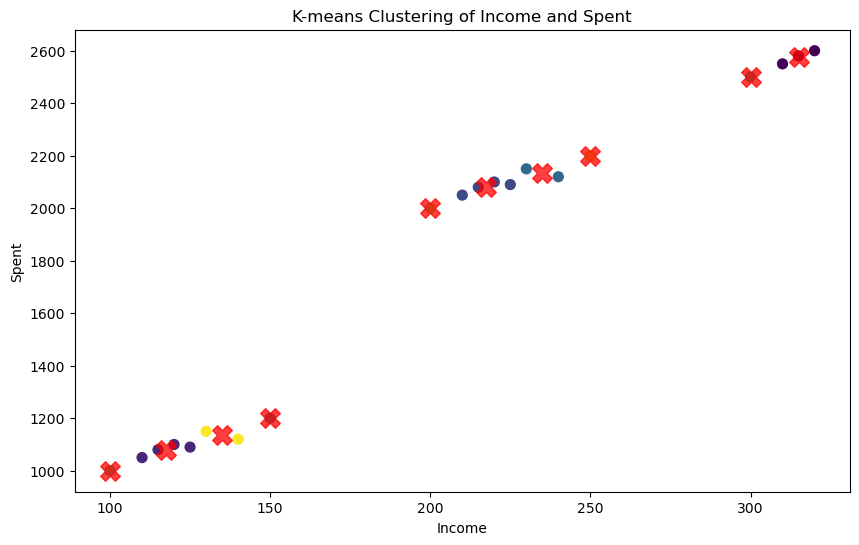

{0: ['1'], 1: ['6', '11', '16', '19'], 2: ['9', '14'], 3: ['3'], 4: ['2'], 5: ['7', '12', '17', '20'], 6: ['10', '15'], 7: ['4'], 8: ['5'], 9: ['8', '13', '18']}


In [40]:
print(cluster(df))

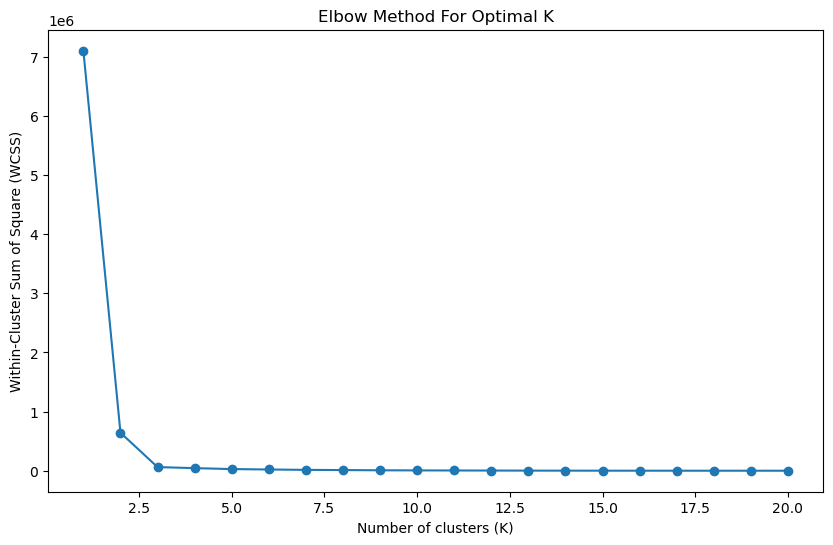

k = 9


In [41]:
wcss(data)